In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project IV/Resources/df_finalized.csv", index_col="customer_id")
df.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status,income_category,loan_category,Interest_Rate_Category(%),age_group,employment_duration_bucket,cred_hist_bucket
customer_id,,,,,,,,,,,,,,,,,,
2.0,21,9600,OWN,5.0,EDUCATION,A,1000,11.14,1,NEW,2,NO DEFAULT,"$0 - $20,000","$0 - $5,000",9.01 - 13,18 - 24,6 - 10,0 - 5
3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,5500,12.87,5,N,3,DEFAULT,"$0 - $20,000","$5,001 - $10,000",9.01 - 13,25 - 34,0 - 5,0 - 5
6.0,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,N,2,DEFAULT,"$0 - $20,000","$0 - $5,000",5 - 9,18 - 24,0 - 5,0 - 5
10.0,21,10000,OWN,6.0,VENTURE,C,1600,14.74,1,N,3,DEFAULT,"$0 - $20,000","$0 - $5,000",13.01 - 17,18 - 24,6 - 10,0 - 5
12.0,21,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500,8.63,1,N,2,DEFAULT,"$0 - $20,000","$0 - $5,000",5 - 9,18 - 24,0 - 5,0 - 5


In [2]:
# remove bucketed variables

df_w_buckets = df.drop(["customer_age","customer_income", "loan_amnt", "loan_int_rate", "employment_duration","cred_hist_length"], axis=1)
df_w_buckets.head()

,home_ownership,loan_intent,loan_grade,term_years,historical_default,Current_loan_status,income_category,loan_category,Interest_Rate_Category(%),age_group,employment_duration_bucket,cred_hist_bucket
customer_id,,,,,,,,,,,,
2.0,OWN,EDUCATION,A,1,NEW,NO DEFAULT,"$0 - $20,000","$0 - $5,000",9.01 - 13,18 - 24,6 - 10,0 - 5
3.0,MORTGAGE,MEDICAL,B,5,N,DEFAULT,"$0 - $20,000","$5,001 - $10,000",9.01 - 13,25 - 34,0 - 5,0 - 5
6.0,OWN,VENTURE,A,1,N,DEFAULT,"$0 - $20,000","$0 - $5,000",5 - 9,18 - 24,0 - 5,0 - 5
10.0,OWN,VENTURE,C,1,N,DEFAULT,"$0 - $20,000","$0 - $5,000",13.01 - 17,18 - 24,6 - 10,0 - 5
12.0,OWN,HOMEIMPROVEMENT,A,1,N,DEFAULT,"$0 - $20,000","$0 - $5,000",5 - 9,18 - 24,0 - 5,0 - 5


In [3]:
# print out the column datatypes

df_w_buckets.dtypes

,0
home_ownership,object
loan_intent,object
loan_grade,object
term_years,int64
historical_default,object
Current_loan_status,object
income_category,object
loan_category,object
Interest_Rate_Category(%),object
age_group,object


In [4]:
# Generate our categorical variable lists

df_cat_w_buckets = df_w_buckets.dtypes[df.dtypes == "object"].index.tolist()
df_cat_w_buckets

['home_ownership',
 'loan_intent',
 'loan_grade',
 'historical_default',
 'Current_loan_status',
 'income_category',
 'loan_category',
 'Interest_Rate_Category(%)',
 'age_group',
 'employment_duration_bucket',
 'cred_hist_bucket']

In [5]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse_output=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df_w_buckets = pd.DataFrame(enc.fit_transform(df_w_buckets[df_cat_w_buckets]))

# Add the encoded variable names to the DataFrame
encode_df_w_buckets.columns = enc.get_feature_names_out(df_cat_w_buckets)
encode_df_w_buckets.head()


,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,...,employment_duration_bucket_36 - 40,employment_duration_bucket_40+,employment_duration_bucket_6 - 10,cred_hist_bucket_0 - 5,cred_hist_bucket_11 - 15,cred_hist_bucket_16 - 20,cred_hist_bucket_21 - 25,cred_hist_bucket_26 - 30,cred_hist_bucket_30+,cred_hist_bucket_6 - 10
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
encode_df_w_buckets.columns

Index(['home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'historical_default_N', 'historical_default_NEW',
       'historical_default_Y', 'Current_loan_status_DEFAULT',
       'Current_loan_status_NO DEFAULT', 'income_category_$0 - $20,000',
       'income_category_$20,001 - $40,000',
       'income_category_$40,001 - $60,000',
       'income_category_$60,001 - $80,000', 'income_category_$80,001+',
       'loan_category_$0 - $5,000', 'loan_category_$10,001 - $15,000',
       'loan_category_$15,001 - $20,000', 'loan_category_$20,001+',
       'loan_category_$5,001 - $10,000',
       'Interest_Rate_Category(%)_13.01 - 17',
       'Interest_Rate_Category(%)_17.01 - 21', 'Int

In [7]:
# Merge one-hot encoded features and drop the originals

df_w_buckets = df_w_buckets.merge(encode_df_w_buckets, left_index=True, right_index=True)
df_w_buckets = df_w_buckets.drop(df_cat_w_buckets,axis=1)
df_w_buckets.head()

,term_years,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,...,employment_duration_bucket_36 - 40,employment_duration_bucket_40+,employment_duration_bucket_6 - 10,cred_hist_bucket_0 - 5,cred_hist_bucket_11 - 15,cred_hist_bucket_16 - 20,cred_hist_bucket_21 - 25,cred_hist_bucket_26 - 30,cred_hist_bucket_30+,cred_hist_bucket_6 - 10
customer_id,,,,,,,,,,,,,,,,,,,,,
2.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Split our preprocessed data into our features and target arrays
y = df_w_buckets["Current_loan_status_DEFAULT"].values
X = df_w_buckets.drop(["Current_loan_status_DEFAULT","Current_loan_status_NO DEFAULT"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [9]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# Define the model I
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 4

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 497 (1.94 KB)

 Trainable params: 497 (1.94 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compile the model I
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [12]:
# Train the model I
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7389 - loss: 0.5065
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9421 - loss: 0.1585
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9498 - loss: 0.1181
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9507 - loss: 0.1152
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9552 - loss: 0.1003
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9578 - loss: 0.0988
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9612 - loss: 0.0928
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9605 - loss: 0.0959
Epoch 9/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9579 - loss: 0.0962
Epoch 10/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9627 - loss: 0.0896
Epoch 11/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9612 - loss: 0.0938
Epoch 12/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

167/167 - 0s - 2ms/step - accuracy: 0.9570 - loss: 0.1065
Loss: 0.10645640641450882, Accuracy: 0.9570114612579346


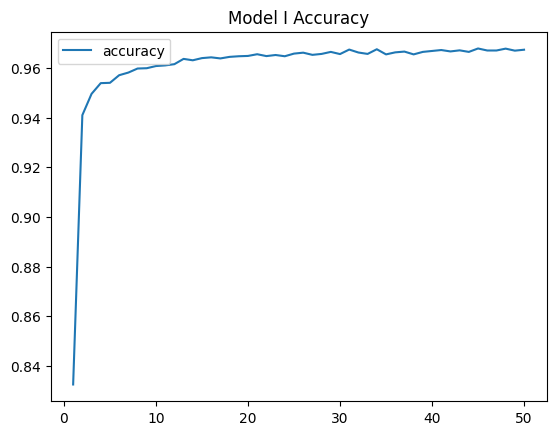

In [14]:
# Create a DataFrame containing training history
history_df_MI = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df_MI.plot(y="accuracy")
plt.title("Model I Accuracy")
# Save the plot as a PNG file
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Project IV/Resources/model_I_accuracy.png")
plt.show()

In [15]:
# Define the model II - try with lower data nodes on hidden layers without changing activation functions.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  6
hidden_nodes_layer2 = 4

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 6)                   │             342 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 375 (1.46 KB)

 Trainable params: 375 (1.46 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Compile the model II
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Train the model II
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7838 - loss: 0.4848
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9326 - loss: 0.1731
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9458 - loss: 0.1239
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9541 - loss: 0.1069
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9533 - loss: 0.1074
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9581 - loss: 0.0989
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9564 - loss: 0.1005
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9584 - loss: 0.0982
Epoch 9/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9581 - loss: 0.0968
Epoch 10/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9559 - loss: 0.0994
Epoch 11/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9599 - loss: 0.0941
Epoch 12/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [18]:
# Evaluate the model II using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

167/167 - 0s - 2ms/step - accuracy: 0.9563 - loss: 0.1119
Loss: 0.11189859360456467, Accuracy: 0.9562605619430542


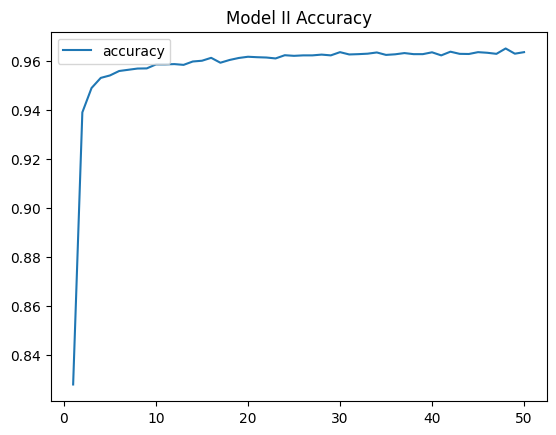

In [19]:
# Create a DataFrame containing training history
history_df_MII = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df_MII.plot(y="accuracy")
plt.title("Model II Accuracy")
# Save the plot as a PNG file
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Project IV/Resources/model_II_accuracy.png")
plt.show()

In [20]:
# Define the model III - try with one activation function instead of two. keep the data nodes # for the first hidden layer
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 8)                   │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 465 (1.82 KB)

 Trainable params: 465 (1.82 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Compile the model III
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Train the model III
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7935 - loss: 0.4560
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9419 - loss: 0.1578
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9499 - loss: 0.1236
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9542 - loss: 0.1069
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9550 - loss: 0.1050
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9548 - loss: 0.1044
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9574 - loss: 0.1003
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9554 - loss: 0.1043
Epoch 9/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9585 - loss: 0.0987
Epoch 10/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9594 - loss: 0.0960
Epoch 11/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9626 - loss: 0.0913
Epoch 12/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

In [23]:
# Evaluate the model III using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

167/167 - 0s - 2ms/step - accuracy: 0.9615 - loss: 0.1108
Loss: 0.11082427203655243, Accuracy: 0.961516797542572


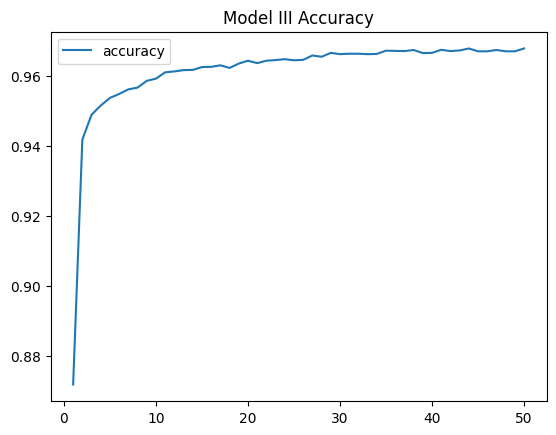

In [24]:
# Create a DataFrame containing training history
history_df_MIII = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df_MIII.plot(y="accuracy")
plt.title("Model III Accuracy")
# Save the plot as a PNG file
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Project IV/Resources/model_III_accuracy.png")
plt.show()

In [25]:
df.columns

Index(['customer_age', 'customer_income', 'home_ownership',
       'employment_duration', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'term_years', 'historical_default', 'cred_hist_length',
       'Current_loan_status', 'income_category', 'loan_category',
       'Interest_Rate_Category(%)', 'age_group', 'employment_duration_bucket',
       'cred_hist_bucket'],
      dtype='object')

In [26]:
# remove bucket variables

df_wo_buckets = df.drop(["age_group","income_category", "loan_category", "Interest_Rate_Category(%)", "employment_duration_bucket","cred_hist_bucket"], axis=1)
df_wo_buckets.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
customer_id,,,,,,,,,,,,
2.0,21,9600,OWN,5.0,EDUCATION,A,1000,11.14,1,NEW,2,NO DEFAULT
3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,5500,12.87,5,N,3,DEFAULT
6.0,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,N,2,DEFAULT
10.0,21,10000,OWN,6.0,VENTURE,C,1600,14.74,1,N,3,DEFAULT
12.0,21,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500,8.63,1,N,2,DEFAULT


In [27]:
# print out the column datatypes

df_wo_buckets.dtypes

,0
customer_age,int64
customer_income,int64
home_ownership,object
employment_duration,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
term_years,int64
historical_default,object


In [28]:
# Generate our categorical variable lists
df_cat_wo_buckets = df_wo_buckets.dtypes[df.dtypes == "object"].index.tolist()
df_cat_wo_buckets

['home_ownership',
 'loan_intent',
 'loan_grade',
 'historical_default',
 'Current_loan_status']

In [29]:
# Check the number of unique values in each column
df_wo_buckets[df_cat_wo_buckets].nunique()

,0
home_ownership,4
loan_intent,6
loan_grade,5
historical_default,3
Current_loan_status,2


In [30]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse_output=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df_wo_buckets = pd.DataFrame(enc.fit_transform(df_wo_buckets[df_cat_wo_buckets]))

# Add the encoded variable names to the DataFrame
encode_df_wo_buckets.columns = enc.get_feature_names_out(df_cat_wo_buckets)
encode_df_wo_buckets.head()

,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,historical_default_N,historical_default_NEW,historical_default_Y,Current_loan_status_DEFAULT,Current_loan_status_NO DEFAULT
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [31]:
# Merge one-hot encoded features and drop the originals
df_wo_buckets = df_wo_buckets.merge(encode_df_wo_buckets, left_index=True, right_index=True)
df_wo_buckets = df_wo_buckets.drop(df_cat_wo_buckets, axis=1)
df_wo_buckets.head()

,customer_age,customer_income,employment_duration,loan_amnt,loan_int_rate,term_years,cred_hist_length,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,...,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,historical_default_N,historical_default_NEW,historical_default_Y,Current_loan_status_DEFAULT,Current_loan_status_NO DEFAULT
customer_id,,,,,,,,,,,,,,,,,,,,,
2.0,21,9600,5.0,1000,11.14,1,2,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3.0,25,9600,1.0,5500,12.87,5,3,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6.0,21,9900,2.0,2500,7.14,1,2,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
10.0,21,10000,6.0,1600,14.74,1,3,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
12.0,21,10000,2.0,4500,8.63,1,2,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [32]:
df_wo_buckets.columns

Index(['customer_age', 'customer_income', 'employment_duration', 'loan_amnt',
       'loan_int_rate', 'term_years', 'cred_hist_length',
       'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'historical_default_N', 'historical_default_NEW',
       'historical_default_Y', 'Current_loan_status_DEFAULT',
       'Current_loan_status_NO DEFAULT'],
      dtype='object')

In [33]:
# Split our preprocessed data into our features and target arrays
y = df_wo_buckets["Current_loan_status_DEFAULT"].values
X = df_wo_buckets.drop(["Current_loan_status_DEFAULT","Current_loan_status_NO DEFAULT"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [34]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [35]:
# Define the model IV - without using categorized/bucketed dataset
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 4

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 8)                   │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 249 (996.00 B)

 Trainable params: 249 (996.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Compile the model IV
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
# Train the model IV
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6020 - loss: 0.7236
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9213 - loss: 0.2433
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9308 - loss: 0.1614
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9339 - loss: 0.1509
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9301 - loss: 0.1531
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9313 - loss: 0.1474
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9363 - loss: 0.1407
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9346 - loss: 0.1418
Epoch 9/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9346 - loss: 0.1426
Epoch 10/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9390 - loss: 0.1343
Epoch 11/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9350 - loss: 0.1429
Epoch 12/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [38]:
# Evaluate the model IV using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

167/167 - 0s - 2ms/step - accuracy: 0.9304 - loss: 0.1489
Loss: 0.14887939393520355, Accuracy: 0.9303547739982605


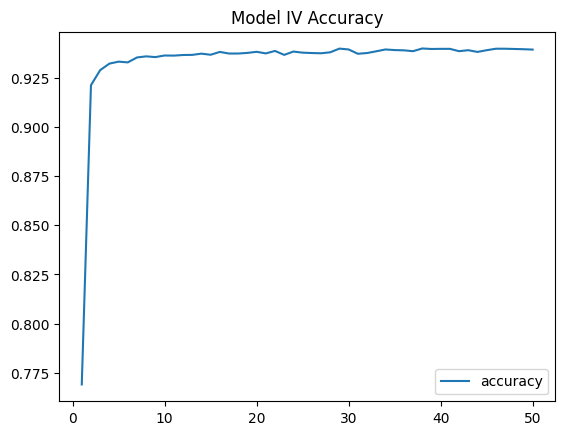

In [39]:
# Create a DataFrame containing training history
history_df_MIV = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df_MIV.plot(y="accuracy")
plt.title("Model IV Accuracy")
# Save the plot as a PNG file
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Project IV/Resources/model_IV_accuracy.png")
plt.show()

In [40]:
# Define the model V - try with lower data nodes on hidden layers without changing activation functions.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  6
hidden_nodes_layer2 = 4

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 6)                   │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 4)                   │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 189 (756.00 B)

 Trainable params: 189 (756.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Compile the model V
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [42]:
# Train the model V
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7156 - loss: 0.5381
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9180 - loss: 0.1789
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9238 - loss: 0.1616
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9259 - loss: 0.1567
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9306 - loss: 0.1492
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9306 - loss: 0.1495
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9335 - loss: 0.1487
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9384 - loss: 0.1377
Epoch 9/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9346 - loss: 0.1408
Epoch 10/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9339 - loss: 0.1429
Epoch 11/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9366 - loss: 0.1362
Epoch 12/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [43]:
# Evaluate the model V using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

167/167 - 0s - 2ms/step - accuracy: 0.9311 - loss: 0.1484
Loss: 0.1483619064092636, Accuracy: 0.9311056733131409


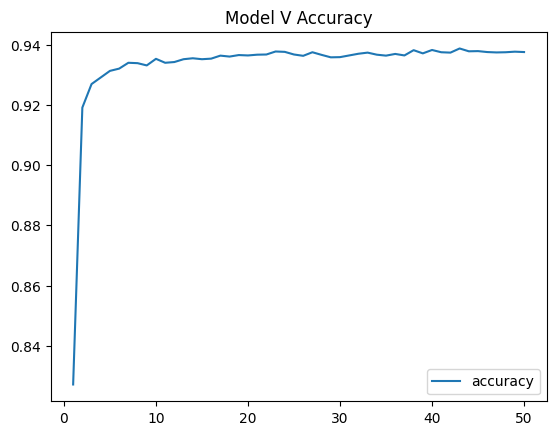

In [44]:
# Create a DataFrame containing training history
history_df_MV = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df_MV.plot(y="accuracy")
plt.title("Model V Accuracy")
# Save the plot as a PNG file
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Project IV/Resources/model_V_accuracy.png")
plt.show()

In [45]:
# Define the model VI - try with one activation function instead of two. keep the data nodes # for the first hidden layer
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 8)                   │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217 (868.00 B)

 Trainable params: 217 (868.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Compile the model VI
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [47]:
# Train the model VI
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7372 - loss: 0.5194
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9140 - loss: 0.2093
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9256 - loss: 0.1726
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9281 - loss: 0.1582
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9262 - loss: 0.1593
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9330 - loss: 0.1494
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9306 - loss: 0.1488
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9334 - loss: 0.1457
Epoch 9/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9361 - loss: 0.1429
Epoch 10/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9338 - loss: 0.1439
Epoch 11/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9332 - loss: 0.1448
Epoch 12/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [48]:
# Evaluate the model VI using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

167/167 - 0s - 2ms/step - accuracy: 0.9317 - loss: 0.1440
Loss: 0.14401617646217346, Accuracy: 0.9316688776016235


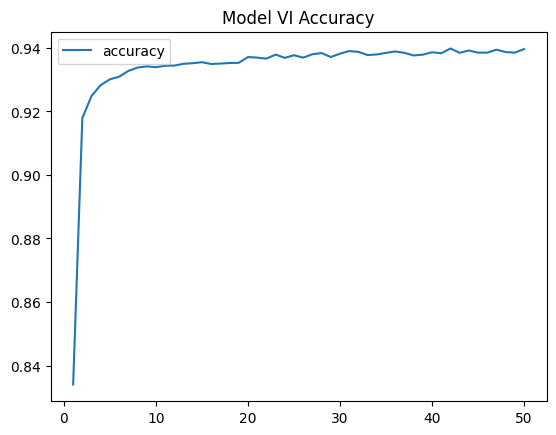

In [49]:
# Create a DataFrame containing training history
history_df_MVI = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df_MVI.plot(y="accuracy")
plt.title("Model VI Accuracy")
# Save the plot as a PNG file
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Project IV/Resources/model_VI_accuracy.png")
plt.show()